# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Package-imports" data-toc-modified-id="Package-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Package imports</a></div><div class="lev2 toc-item"><a href="#Import-spgl1" data-toc-modified-id="Import-spgl1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import <code>spgl1</code></a></div><div class="lev2 toc-item"><a href="#Garbage-collection" data-toc-modified-id="Garbage-collection-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Garbage collection</a></div><div class="lev1 toc-item"><a href="#Plotting-data-from-Proximal-Denoising" data-toc-modified-id="Plotting-data-from-Proximal-Denoising-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting data from Proximal Denoising</a></div><div class="lev2 toc-item"><a href="#Plotting-noise-scaling" data-toc-modified-id="Plotting-noise-scaling-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotting noise scaling</a></div><div class="lev2 toc-item"><a href="#Re-doing-figures" data-toc-modified-id="Re-doing-figures-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Re-doing figures</a></div><div class="lev1 toc-item"><a href="#MSE-as-a-function-of-sigma" data-toc-modified-id="MSE-as-a-function-of-sigma-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MSE as a function of <code>sigma</code></a></div>

# Package imports

In [1]:
import sys

In [2]:
%pylab inline
import matplotlib.legend as mlegend
import matplotlib.lines as mlines

Populating the interactive namespace from numpy and matplotlib


In [3]:
import json

## Import `spgl1`

In [ ]:
curdir = !pwd
curdir = curdir[0]

In [ ]:
spgl1Directory = curdir+'/../SPGL1_python_port/'
sys.path.append(spgl1Directory)

In [ ]:
from spgl1 import spgl1

## Garbage collection

In [102]:
import gc
# gc.collect()

# Plotting data from Proximal Denoising

In [4]:
with open('../data/ProxDenois_7_Sat_Apr__1_15-17-55_2017.json', 'r+', encoding='utf-8') as fp:
    pd_data = json.load(fp)

In [5]:
pd_N = np.array(pd_data['N'])
pd_sqZ = np.array(pd_data['sqNormZ'])

In [6]:
pd = np.vstack((pd_N, pd_sqZ)).T

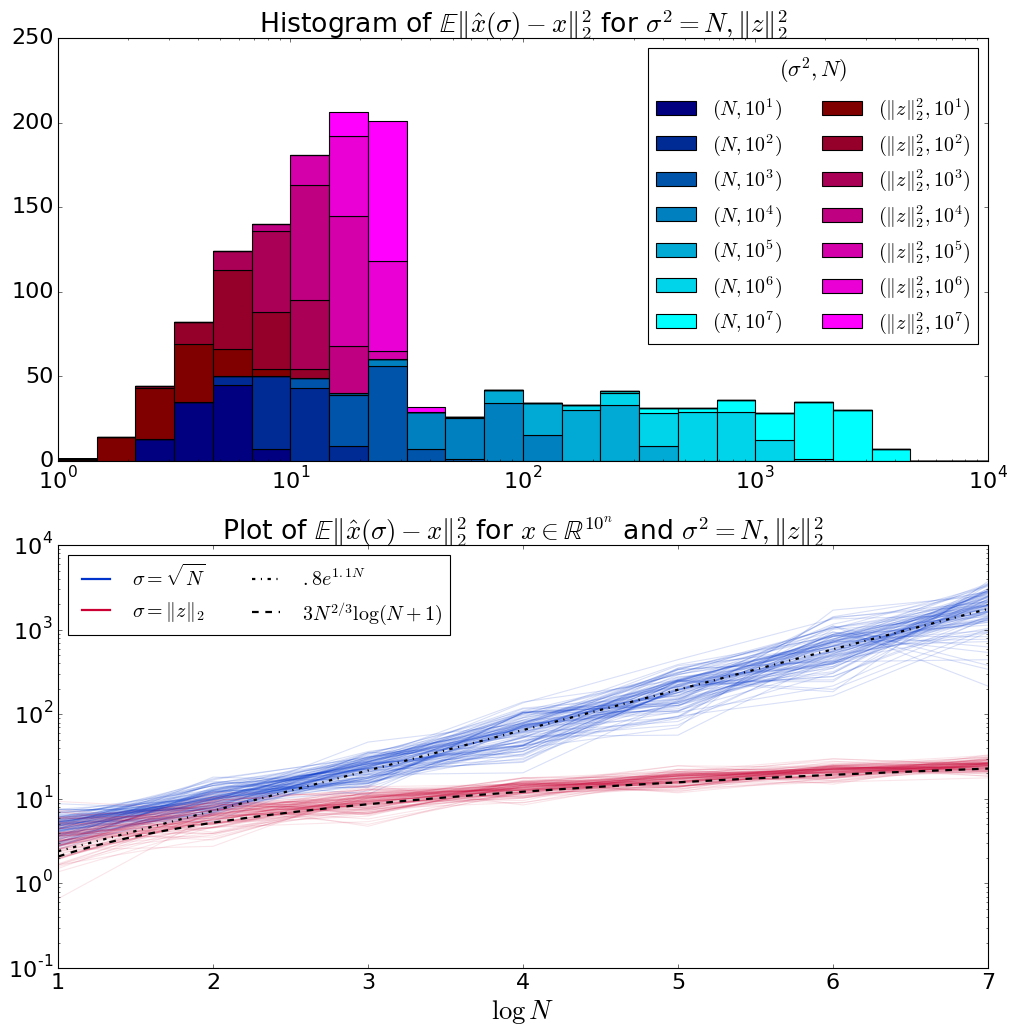

In [7]:
# Update font-size for axis tick labels if using savefig
matplotlib.rcParams.update({'font.size': 20})
fontSize = 24
legendFontSize = 18

fig, ax = plt.subplots(figsize=(15,15))

# Plot histogram of MSE
plt.subplot(211)
plt.hist(pd, log=False, stacked=True, bins=np.logspace(0, 4, 25), rwidth=1,
         color=[(0, k, .5 + k/2) for k in np.linspace(0, 1, 7)]+[(.5+k/2, 0, k) for k in np.linspace(0, 1, 7)])
leg1_lbl1 = ['$(N, 10^'+str(j)+')$' for j in range(1,8)]
leg1_lbl2 = ['$(\\|z\\|_2^2, 10^'+str(j)+')$' for j in range(1,8)]
leg1_ttl = '$(\\sigma^2, N)$'
leg1 = plt.legend(leg1_lbl1+leg1_lbl2, markerscale=.3, ncol=2, fontsize=legendFontSize)
leg1.set_title(leg1_ttl)
plt.title('Histogram of $\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$ for $\\sigma^2 = N, \\|z\\|_2^2$', fontsize=fontSize)
plt.xscale('log');

# Plot MSE as a function of log(N)
plt.subplot(212)
# Plot the lines
plt.plot(range(1, 8), pd_N, c=(0,.2,.8,.15));
plt.plot(range(1, 8), pd_sqZ, c=(.8,0,.2,.1));
# See if we can get an analytic approximation to the lines
t = np.linspace(1, 7, 100);
plt.plot(t, 3 * t**(2/3)*np.log(t+1), 'k--', linewidth=2)
plt.plot(t, .8*np.exp(1.1*t), 'k-.', lw=2)
# Make the legend
blue_line = mlines.Line2D([], [], c=(0, .2, .8), lw=2, label='$\\sigma = \\sqrt{N}$')
red_line = mlines.Line2D([],[], c=(.8, 0, .2), lw=2, label='$\\sigma = \\|z\\|_2$')
blue_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-.', label='$.8 e^{1.1 N}$')
red_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='--', label='$3N^{2/3}\\log(N+1)$')
plt.legend(handles=[blue_line, red_line, blue_meanline, red_meanline], loc=2, ncol=2, fontsize=legendFontSize)
# Add the title and labels
plt.title('Plot of $\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$ for $x\\in \\mathbb{R}^{10^n}$ and $\\sigma^2 = N, \\|z\\|_2^2$',
          fontsize=fontSize)
plt.xlabel('$\\log\\,N$', fontsize=fontSize)
# Plot on log scale
plt.yscale('log');
# plt.ylim(0,100);

# Save figure
plt.savefig('PD_MSE_DimScaling.svg', dpi=72, format='svg')
plt.close()

In [11]:
doSaveFig = 0
if doSaveFig:
    fig.savefig('PDMSEDimScaling.png', dpi=72, format='png')

## Plotting noise scaling

In [9]:
logNmax = 7
logNvec = np.array(range(1, logNmax+1))
logNvec = np.atleast_2d(logNvec).T
noiseNormSq = np.zeros((logNmax, 100))
for logN in range(1, logNmax+1):
    for k in range(100):
        z = np.random.randn(10**logN)
        noiseNormSq[logN-1, k] = np.dot(z,z)

In [31]:
matplotlib.rcParams.update({'font.size': 20})
fontSize = 24
legendFontSize = 18

plt.subplots(figsize=(15,15))

# # # Plot 1
plt.subplot(211)
plt.plot(logNvec, noiseNormSq, c='k', alpha=.1, lw=3);
plt.plot(logNvec, 10**logNvec, linestyle='-', c=(.8, 0, .2), lw=2);
plt.yscale('log');
plt.title('Plot of $\\|z\\|_2^2$ for $z \\sim \\mathcal{N}(0, I_N)$')
# legend
black_line = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-', label='$z$')
red_Nline = mlines.Line2D([],[], c=(.8,0,.2), lw=2, linestyle='-', label='$N$')
plt.legend(handles=[black_line, red_Nline], loc=2, fontsize=18)

# # # Plot 2
plt.subplot(212)
plt.plot(logNvec, np.log(np.abs((noiseNormSq - 10**logNvec)/(10**logNvec))), c='k', alpha=.1, lw=2);
plt.plot(logNvec, -1.2*logNvec, 'r', lw=2)
plt.xlabel('$\\log N$');
plt.title('Plot of $N^{-1}(\\|z\\|_2^2 - N)$ for $z \\sim \\mathcal{N}(0, I_N)$');

#plt.savefig('mynoisefig.svg', dpi=72, format='svg')

plt.savefig('normalNormDimScaling.png', dpi=72, format='png')
plt.close()

## Re-doing figures

In [18]:
matplotlib.rcParams.update({'font.size': 20})
fontSize = 24
legendFontSize = 18

plt.subplots(figsize=(20,8))


# Plot MSE as a function of log(N)
plt.subplot(121)
# Plot the lines
plt.plot(range(1, 8), pd_N, c=(0,.2,.8,.15));
plt.plot(range(1, 8), pd_sqZ, c=(.8,0,.2,.1));
# See if we can get an analytic approximation to the lines
t = np.linspace(1, 7, 100);
plt.plot(t, 3 * t**(2/3)*np.log(t+1), 'k--', linewidth=2)
plt.plot(t, .8*np.exp(1.1*t), 'k-.', lw=2)
# Make the legend
blue_line = mlines.Line2D([], [], c=(0, .2, .8), lw=2, label='$\\sigma = \\sqrt{N}$')
red_line = mlines.Line2D([],[], c=(.8, 0, .2), lw=2, label='$\\sigma = \\|z\\|_2$')
blue_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-.', label='$.8 e^{1.1 N}$')
red_meanline = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='--', label='$3N^{2/3}\\log(N+1)$')
plt.legend(handles=[blue_line, red_line, blue_meanline, red_meanline], loc=2, ncol=2, fontsize=legendFontSize)
# Add the title and labels
plt.title('$\\mathbb{E} \\|\\hat x(\\sigma) - x\\|_2^2$ for $x\\in \\mathbb{R}^{N}$, $\\sigma^2 = N, \\|z\\|_2^2$',
          fontsize=fontSize)
plt.xlabel('$\\log\\,N$', fontsize=fontSize)
# Plot on log scale
plt.yscale('log');


plt.subplot(122)
plt.plot(logNvec, noiseNormSq, c='k', alpha=.1, lw=3);
plt.plot(logNvec, 10**logNvec, linestyle='-', c=(.8, 0, .2), lw=2);
plt.yscale('log');
plt.xlabel('$\log N$', fontsize=fontSize)
plt.title('Plot of $\\|z\\|_2^2$ for $z \\sim \\mathcal{N}(0, I_N)$')
# legend
black_line = mlines.Line2D([],[], c=(0,0,0), lw=2, linestyle='-', label='$z$')
red_Nline = mlines.Line2D([],[], c=(.8,0,.2), lw=2, linestyle='-', label='$N$')
plt.legend(handles=[black_line, red_Nline], loc=2, fontsize=18)

plt.savefig('pdmsedimscalingandnoise.png', dpi=72, format='png')
plt.close()

# MSE as a function of `sigma`

In [ ]:
def parseData(**data):
    N = data.get('N')
    s = data.get('s')
    A = data.get('A')
    x = data.get('x')
    y = data.get('y')
    z = data.get('z')
    a = data.get('a')
    if x is None:
        if a is None:
            a = 1e6
        if s is None:
            s = 3
    if N is None:
        if A is None:
            proxD = True
            N = x.size
            m = N
        else:
            proxD = False
            m, N = A.shape
    elif m is None:
        if A is None:
            proxD = True
            m = N
        else:
            proxD = False
            m = A.shape[0]
    elif m < N:
        proxD = False
        A = np.random.randn(m,N)/np.sqrt(m)
    else:
        raise ValueError('We don\'t want to handle this case')
    if x is None:
        x = np.array([a for _ in range(s)] + 
                     [0 for _ in range(N-s)])
    if z is None:
        z = np.random.randn(m)
    if y is None:
        if proxD:
            y = x + eta * z
        else:
            y = np.dot(A,x) + eta * z
    return N, s, A, x, y, z, a

In [ ]:
def mse(sigma,eta=0.1,**data):
    N, s, A, x, y, z, a = parseData(**data)
    try:
        len_sigma = len(sigma)
    except TypeError as te:
        len_sigma = 1